In [1]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import backend as K
import sys
import os
from matplotlib.pyplot import imshow
from matplotlib import pyplot as plt

sys.path.append("..") # Adds higher directory to python modules path.
from train.cnn import simple_cnn

In [39]:
weights_folder = '../weights'
data_folder = '../../binary/data'
#weights_file_name = 'small-cnn-08-1.00.hdf5'
weights_file_name = 'small-cnn-07-0.94.hdf5'
weights_file_name = 'first-iteration.h5'
weights_path = os.path.join(weights_folder, weights_file_name)

In [40]:
INPUT_IMG_SIZE = (160, 160)
model = simple_cnn(INPUT_IMG_SIZE)
model.load_weights(weights_path)

In [41]:
batch_size = 64
test_datagen = ImageDataGenerator(rescale=1./255)
dev_path = os.path.join(data_folder, 'dev-glasses-ex')
validation_generator = test_datagen.flow_from_directory(
        dev_path,
        target_size=INPUT_IMG_SIZE,
        batch_size=batch_size,
        shuffle=False,
        class_mode='binary')


dataset_size = sum([len(files) for r, d, files in os.walk(dev_path)])
print('dataset_size', dataset_size)
steps = dataset_size // batch_size
X = []
y = []
for (idx, (batch_x, batch_y)) in enumerate(validation_generator):
    X.append(batch_x)
    y.append(batch_y)
    print(idx, "/", steps)
    if idx >= steps:
        break
    
X = np.concatenate(X)
y = np.concatenate(y)

Found 1377 images belonging to 2 classes.
dataset_size 1378
0 / 21
1 / 21
2 / 21
3 / 21
4 / 21
5 / 21
6 / 21
7 / 21
8 / 21
9 / 21
10 / 21
11 / 21
12 / 21
13 / 21
14 / 21
15 / 21
16 / 21
17 / 21
18 / 21
19 / 21
20 / 21
21 / 21


In [42]:
validation_generator.class_indices

{'mask': 0, 'notmask': 1}

In [43]:
ev = model.evaluate(X, y)

44/44 [==============================] - 5s 105ms/step - loss: 2.6976 - accuracy: 0.8141


In [27]:
preds = model.predict(X, verbose=1)
wrongs_imgs = X[np.argwhere(y.reshape(len(y), 1) != np.round(preds))[:, 0], :, :, :]
correct_labels = y[np.argwhere(y.reshape(len(y), 1) != np.round(preds))[:, 0]]
wrong_preds = preds[np.argwhere(y.reshape(len(y), 1) != np.round(preds))[:, 0]]

44/44 [==============================] - 5s 104ms/step


0.0 [0.99960315] tf.Tensor([1.], shape=(1,), dtype=float32)


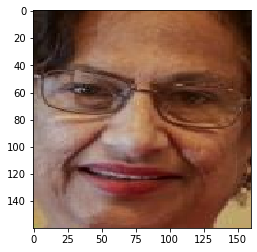

0.0 [0.9994279] tf.Tensor([1.], shape=(1,), dtype=float32)


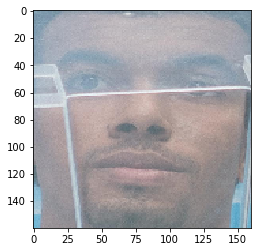

0.0 [0.6606914] tf.Tensor([1.], shape=(1,), dtype=float32)


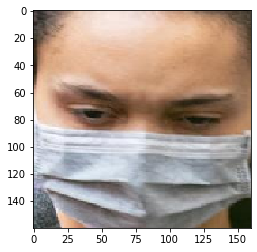

0.0 [0.86051685] tf.Tensor([1.], shape=(1,), dtype=float32)


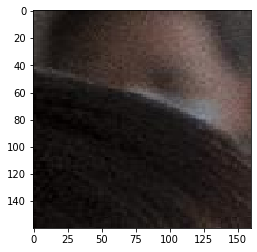

0.0 [0.65036684] tf.Tensor([1.], shape=(1,), dtype=float32)


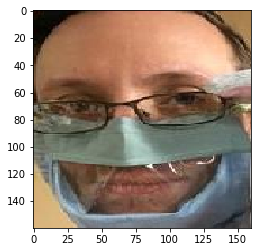

0.0 [0.9014518] tf.Tensor([1.], shape=(1,), dtype=float32)


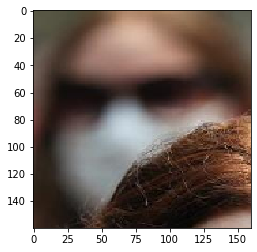

0.0 [0.6486618] tf.Tensor([1.], shape=(1,), dtype=float32)


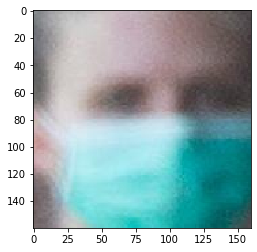

0.0 [0.69699156] tf.Tensor([1.], shape=(1,), dtype=float32)


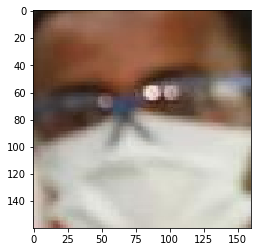

0.0 [0.7314199] tf.Tensor([1.], shape=(1,), dtype=float32)


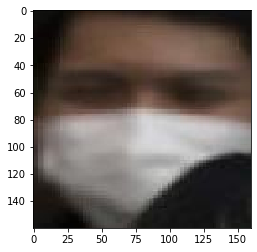

0.0 [0.99189955] tf.Tensor([1.], shape=(1,), dtype=float32)


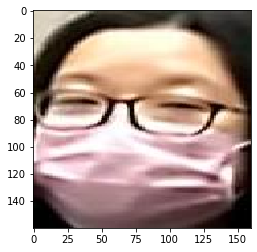

0.0 [0.6133233] tf.Tensor([1.], shape=(1,), dtype=float32)


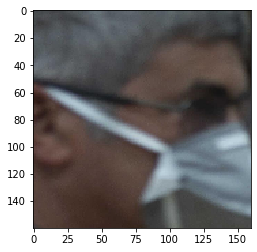

0.0 [0.9989911] tf.Tensor([1.], shape=(1,), dtype=float32)


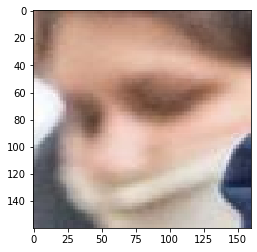

0.0 [0.9993032] tf.Tensor([1.], shape=(1,), dtype=float32)


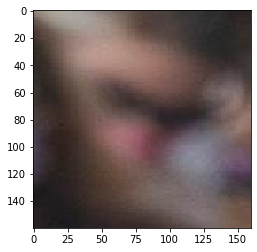

0.0 [0.5833801] tf.Tensor([1.], shape=(1,), dtype=float32)


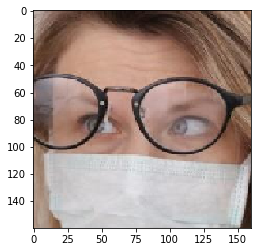

0.0 [0.9338819] tf.Tensor([1.], shape=(1,), dtype=float32)


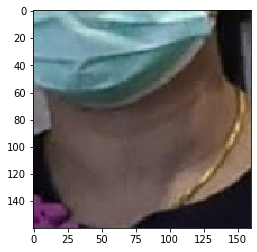

0.0 [0.999922] tf.Tensor([1.], shape=(1,), dtype=float32)


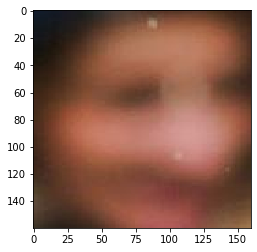

0.0 [0.5362797] tf.Tensor([1.], shape=(1,), dtype=float32)


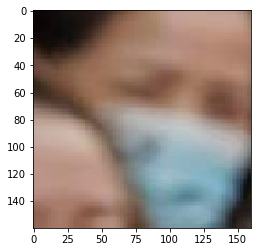

0.0 [0.999922] tf.Tensor([1.], shape=(1,), dtype=float32)


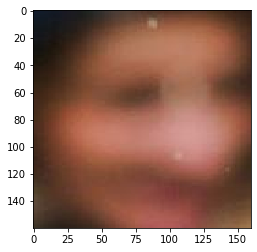

0.0 [0.9999761] tf.Tensor([1.], shape=(1,), dtype=float32)


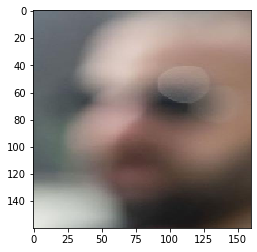

0.0 [0.6486618] tf.Tensor([1.], shape=(1,), dtype=float32)


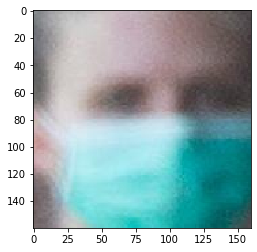

0.0 [0.70951647] tf.Tensor([1.], shape=(1,), dtype=float32)


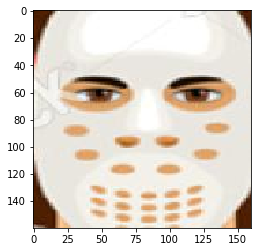

0.0 [0.7466655] tf.Tensor([1.], shape=(1,), dtype=float32)


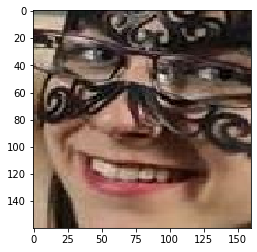

0.0 [0.7765721] tf.Tensor([1.], shape=(1,), dtype=float32)


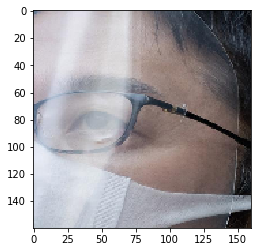

0.0 [0.97798765] tf.Tensor([1.], shape=(1,), dtype=float32)


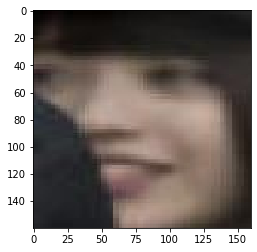

0.0 [0.98091024] tf.Tensor([1.], shape=(1,), dtype=float32)


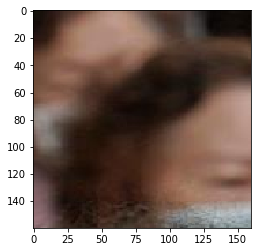

0.0 [0.79059243] tf.Tensor([1.], shape=(1,), dtype=float32)


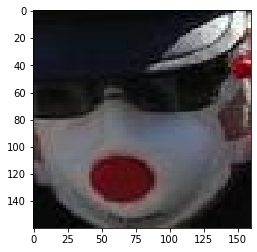

0.0 [0.99189955] tf.Tensor([1.], shape=(1,), dtype=float32)


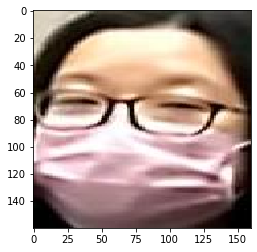

0.0 [0.98091024] tf.Tensor([1.], shape=(1,), dtype=float32)


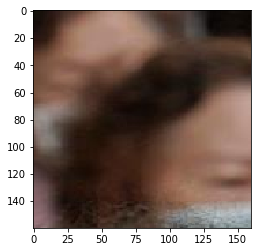

0.0 [0.99585557] tf.Tensor([1.], shape=(1,), dtype=float32)


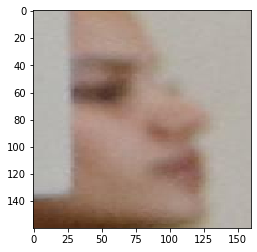

0.0 [0.6133233] tf.Tensor([1.], shape=(1,), dtype=float32)


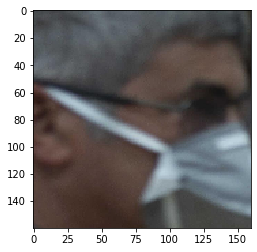

0.0 [0.5623127] tf.Tensor([1.], shape=(1,), dtype=float32)


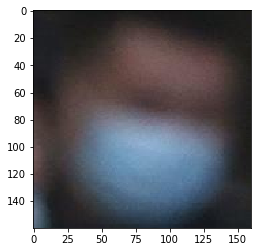

0.0 [0.97111464] tf.Tensor([1.], shape=(1,), dtype=float32)


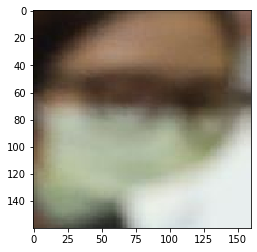

0.0 [0.7466655] tf.Tensor([1.], shape=(1,), dtype=float32)


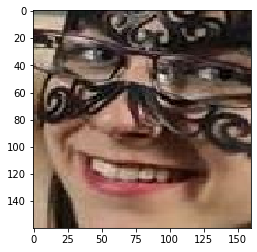

0.0 [0.9992121] tf.Tensor([1.], shape=(1,), dtype=float32)


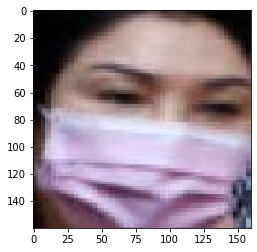

0.0 [0.9230597] tf.Tensor([1.], shape=(1,), dtype=float32)


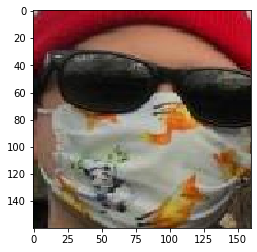

0.0 [0.99017775] tf.Tensor([1.], shape=(1,), dtype=float32)


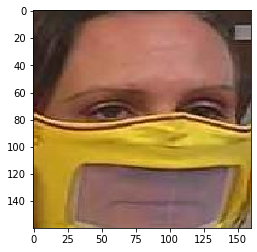

0.0 [0.995913] tf.Tensor([1.], shape=(1,), dtype=float32)


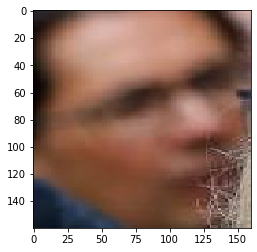

0.0 [0.7314199] tf.Tensor([1.], shape=(1,), dtype=float32)


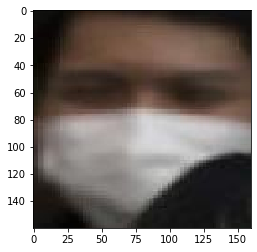

0.0 [0.79059243] tf.Tensor([1.], shape=(1,), dtype=float32)


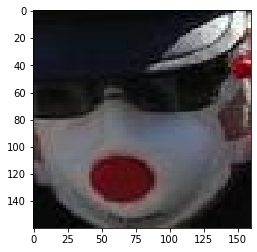

0.0 [0.7765721] tf.Tensor([1.], shape=(1,), dtype=float32)


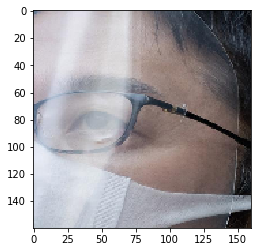

0.0 [0.78058904] tf.Tensor([1.], shape=(1,), dtype=float32)


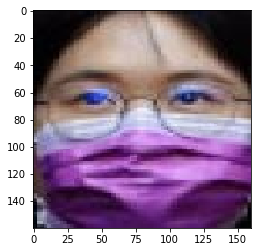

0.0 [0.5312321] tf.Tensor([1.], shape=(1,), dtype=float32)


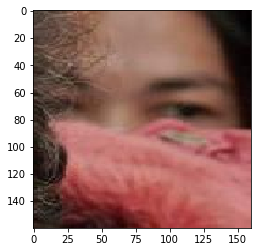

0.0 [0.76236355] tf.Tensor([1.], shape=(1,), dtype=float32)


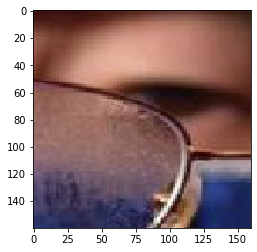

0.0 [0.787019] tf.Tensor([1.], shape=(1,), dtype=float32)


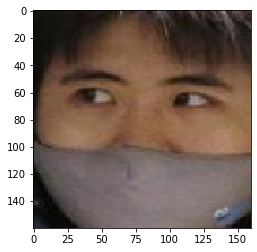

0.0 [0.9230597] tf.Tensor([1.], shape=(1,), dtype=float32)


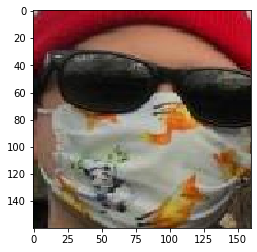

0.0 [0.6451773] tf.Tensor([1.], shape=(1,), dtype=float32)


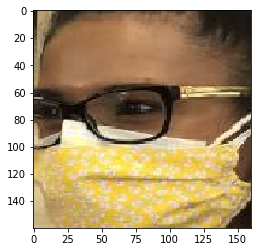

0.0 [0.7147547] tf.Tensor([1.], shape=(1,), dtype=float32)


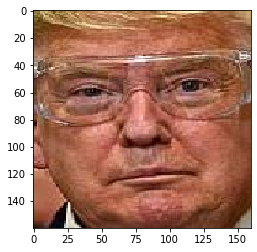

0.0 [0.99733543] tf.Tensor([1.], shape=(1,), dtype=float32)


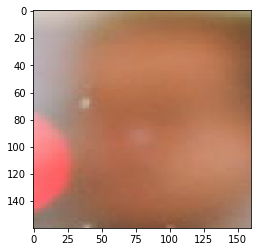

0.0 [0.5822843] tf.Tensor([1.], shape=(1,), dtype=float32)


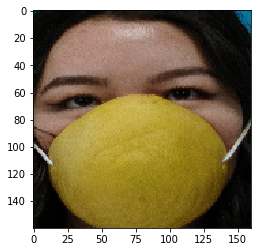

0.0 [0.5833801] tf.Tensor([1.], shape=(1,), dtype=float32)


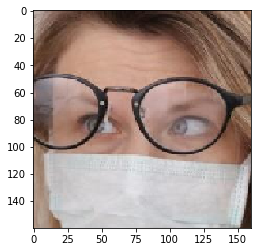

0.0 [0.5742208] tf.Tensor([1.], shape=(1,), dtype=float32)


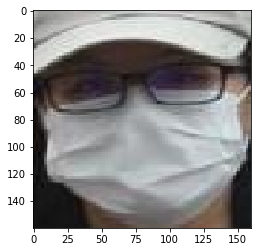

0.0 [0.5905269] tf.Tensor([1.], shape=(1,), dtype=float32)


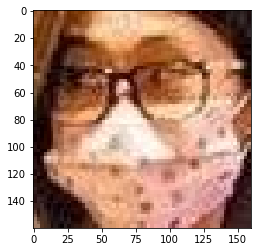

0.0 [0.80088973] tf.Tensor([1.], shape=(1,), dtype=float32)


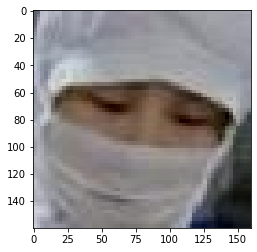

0.0 [0.9059156] tf.Tensor([1.], shape=(1,), dtype=float32)


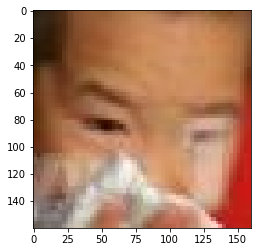

0.0 [0.5047034] tf.Tensor([1.], shape=(1,), dtype=float32)


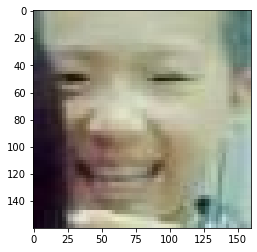

0.0 [0.9868317] tf.Tensor([1.], shape=(1,), dtype=float32)


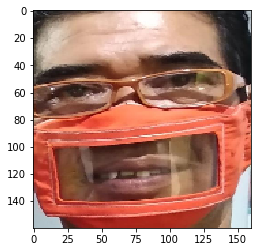

0.0 [0.9993032] tf.Tensor([1.], shape=(1,), dtype=float32)


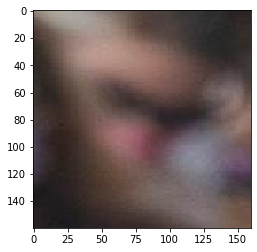

0.0 [0.96038854] tf.Tensor([1.], shape=(1,), dtype=float32)


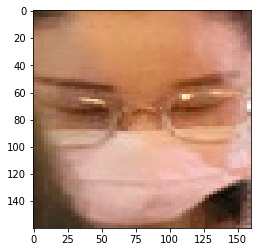

0.0 [0.9999144] tf.Tensor([1.], shape=(1,), dtype=float32)


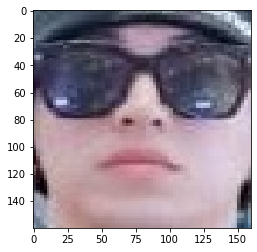

0.0 [0.98963207] tf.Tensor([1.], shape=(1,), dtype=float32)


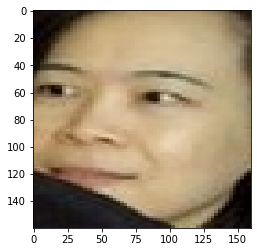

0.0 [0.7952353] tf.Tensor([1.], shape=(1,), dtype=float32)


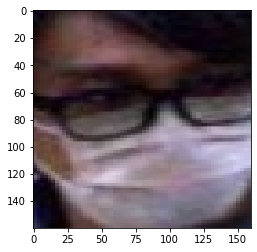

1.0 [0.08891341] tf.Tensor([0.], shape=(1,), dtype=float32)


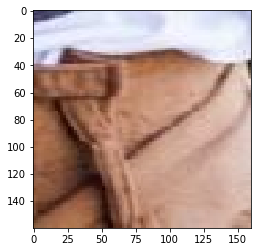

1.0 [0.08175787] tf.Tensor([0.], shape=(1,), dtype=float32)


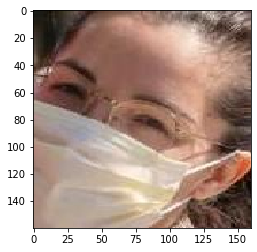

1.0 [0.3058104] tf.Tensor([0.], shape=(1,), dtype=float32)


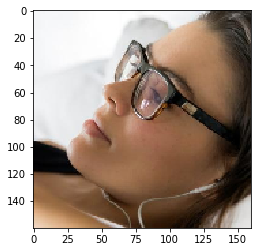

1.0 [0.00549605] tf.Tensor([0.], shape=(1,), dtype=float32)


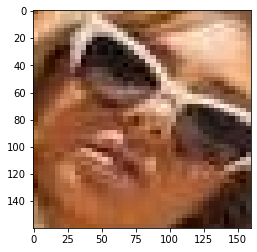

1.0 [0.00073993] tf.Tensor([0.], shape=(1,), dtype=float32)


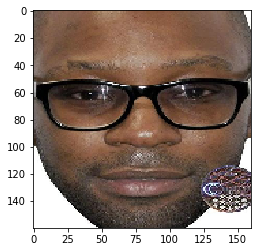

1.0 [0.3087346] tf.Tensor([0.], shape=(1,), dtype=float32)


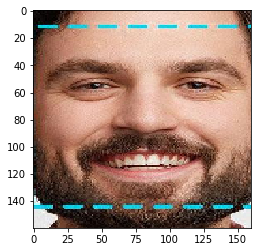

1.0 [0.00090438] tf.Tensor([0.], shape=(1,), dtype=float32)


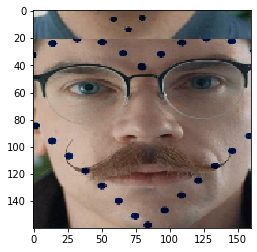

1.0 [0.33540273] tf.Tensor([0.], shape=(1,), dtype=float32)


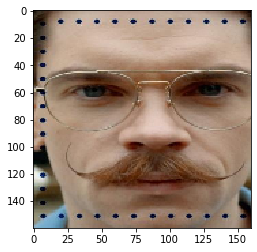

1.0 [0.01931211] tf.Tensor([0.], shape=(1,), dtype=float32)


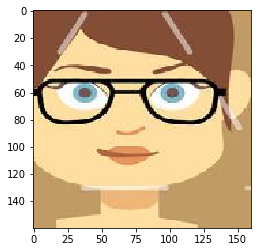

1.0 [0.26259995] tf.Tensor([0.], shape=(1,), dtype=float32)


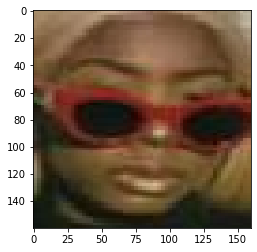

1.0 [0.10123113] tf.Tensor([0.], shape=(1,), dtype=float32)


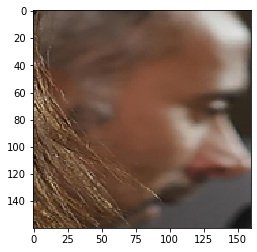

1.0 [0.01447043] tf.Tensor([0.], shape=(1,), dtype=float32)


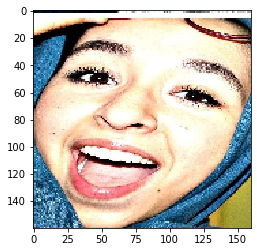

1.0 [0.27297384] tf.Tensor([0.], shape=(1,), dtype=float32)


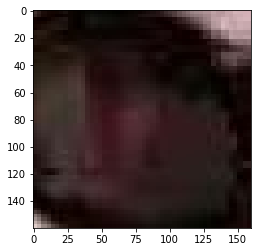

1.0 [0.02465004] tf.Tensor([0.], shape=(1,), dtype=float32)


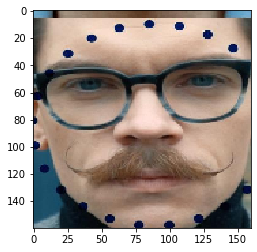

1.0 [0.18029806] tf.Tensor([0.], shape=(1,), dtype=float32)


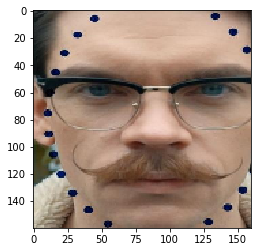

1.0 [0.00048456] tf.Tensor([0.], shape=(1,), dtype=float32)


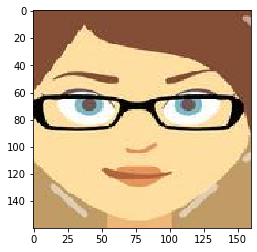

1.0 [0.4825758] tf.Tensor([0.], shape=(1,), dtype=float32)


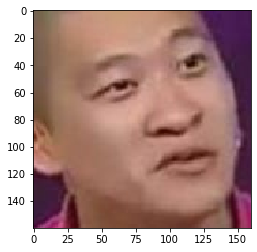

1.0 [0.00047755] tf.Tensor([0.], shape=(1,), dtype=float32)


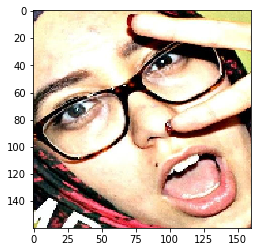

1.0 [0.46959955] tf.Tensor([0.], shape=(1,), dtype=float32)


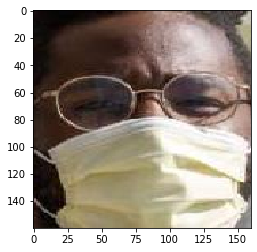

1.0 [0.14765903] tf.Tensor([0.], shape=(1,), dtype=float32)


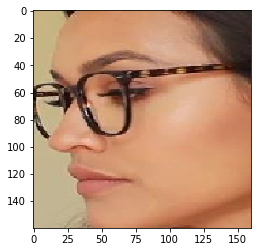

1.0 [0.00091296] tf.Tensor([0.], shape=(1,), dtype=float32)


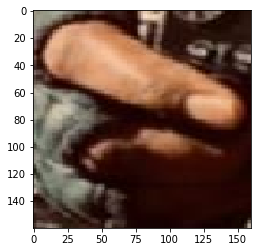

In [30]:
for idx in range(len(wrongs_imgs)):
    print(correct_labels[idx], wrong_preds[idx], K.round(wrong_preds[idx]))
    imshow(wrongs_imgs[idx])
    plt.show()

In [201]:
len(wrongs_imgs)

48